In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/12.4.0/local_installers/cuda-repo-ubuntu2204-12-4-local_12.4.0-550.54.14-1_amd64.deb
!dpkg -i cuda-repo-ubuntu2204-12-4-local_12.4.0-550.54.14-1_amd64.deb
!cp /var/cuda-repo-ubuntu2204-12-4-local/cuda-*-keyring.gpg /usr/share/keyrings/
!apt-get update
!apt-get install -y cuda-12-4 cuda-toolkit-12-4
!export CUDA_PATH=/usr/local/cuda-12.4/
!nvcc --version

--2024-10-08 12:40:57--  https://developer.download.nvidia.com/compute/cuda/12.4.0/local_installers/cuda-repo-ubuntu2204-12-4-local_12.4.0-550.54.14-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3447943098 (3.2G) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu2204-12-4-local_12.4.0-550.54.14-1_amd64.deb’

cuda-repo-ubuntu220 100%[===================>]   3.21G  62.7MB/s    in 53s     

2024-10-08 12:41:50 (62.3 MB/s) - ‘cuda-repo-ubuntu2204-12-4-local_12.4.0-550.54.14-1_amd64.deb’ saved [3447943098/3447943098]

Selecting previously unselected package cuda-repo-ubuntu2204-12-4-local.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu2204-12-4-local_12.4.0-550.54.14-1_amd64.deb ...
Unpacking cuda-repo-ubuntu2204-

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0


In [ ]:
!pip3 uninstall torch -y

Found existing installation: torch 2.4.1+cu121
Uninstalling torch-2.4.1+cu121:
  Successfully uninstalled torch-2.4.1+cu121


In [ ]:
!pip install torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  torch-cluster \
  pyg-lib \
  -f https://data.pyg.org/whl/torch-2.4.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu124.html


In [ ]:
!pip3 install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import pandas as pd
import torch
import numpy as np
import kagglehub
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pyg_lib
import torch_geometric.transforms as T
from torch_geometric.data import HeteroData
from torch_geometric.nn import SAGEConv, to_hetero
import torch.nn.functional as F
from torch import Tensor


from google.colab import drive
drive.mount('/content/drive')

genres = np.load("/content/drive/MyDrive/datasciencepsl/namesngenre.npy")
train = np.load("/content/drive/MyDrive/datasciencepsl/ratings_train.npy")
test = np.load("/content/drive/MyDrive/datasciencepsl/ratings_test.npy")

trainrating = pd.DataFrame(train)
testrating = pd.DataFrame(test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rating = trainrating.combine_first(testrating)
rating

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from math import isnan

# Step 2: Reset the index to keep track of user_id (row names)
rating_reset = rating.reset_index()

# Step 3: Use pd.melt to unpivot the dataframe, turning columns into rows
# This will give us columns: 'user_id' (index), 'movie_id' (column name), and 'rating'
melted_df = pd.melt(rating_reset, id_vars=['index'], var_name='movie_id', value_name='rating')

# Step 4: Drop NaN ratings
melted_df = melted_df.dropna(subset=['rating'])

# Step 5: Rename columns to user, movie, rating
melted_df = melted_df.rename(columns={'index': 'userId', 'movie_id': 'movieId'})

# Step 6: Check the result
melted_df

,userId,movieId,rating
0,0,0,4.0
4,4,0,4.0
14,14,0,2.5
16,16,0,4.5
18,18,0,4.0
...,...,...,...
3036641,61,4978,4.0
3036993,413,4978,3.5
3037093,513,4978,3.0
3037239,49,4979,3.0


In [ ]:
melted_df['rating'].unique()

array([4. , 2.5, 4.5, 3.5, 5. , 3. , 2. , 1.5, 0.5, 1. ])

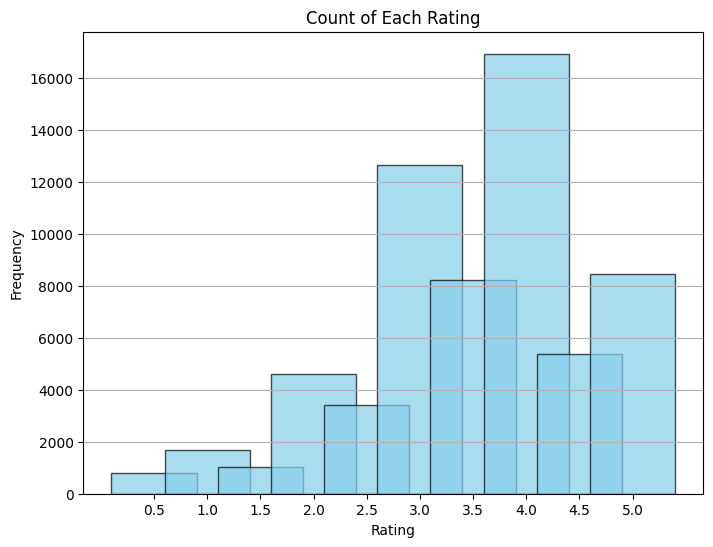

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to simulate melted_df for demonstration purposes
# Uncomment this if you want to test with simulated data
# melted_df = pd.DataFrame({'rating': [4.0, 2.5, 4.5, 3.5, 5.0, 3.0, 2.0, 1.5, 0.5, 1.0, 4.0, 2.5, 3.5, 5.0, 3.0]})

# Count occurrences of each rating
rating_counts = melted_df['rating'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rating_counts.index)  # Set x-ticks to match the unique ratings
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
melted_df["movieId"] = pd.to_numeric(melted_df["movieId"])

user_rates_movie = torch.from_numpy(melted_df[["userId","movieId"]].transpose().values)
user_rates_movie_attr = torch.from_numpy(melted_df["rating"].values).float().view(len(melted_df))

In [ ]:
user_features = torch.eye(len(melted_df['userId'].unique()))
user_features.shape

torch.Size([610, 610])

In [ ]:
#df = pd.read_csv(kagglehub.dataset_download('lukalafaye/movies', path='movie-metadata.csv'))
df = pd.read_csv("/content/drive/MyDrive/datasciencepsl/movie-metadata.csv")
df = df.sort_values(by='movieId', ascending=True).reset_index(drop=True)
df = df.sort_values(by='movieId', ascending=True).reset_index(drop=True).sample(frac=1).reset_index(drop=True)
df['Runtime'] = df['Runtime'].apply(lambda x: int(x.replace(' min', '')))
df.head()

,Unnamed: 0,movieId,Title,Year,Rated,Genre,imdbRating,imdbVotes,Language,Country,Plot,Runtime
0,4422,4837,Search Party,2014,R,"Adventure, Comedy",5.6,8326,"English, Spanish",United States,A pair of friends embark on a mission to reuni...,93
1,1609,1722,Sullivan's Travels,1941,Approved,"Adventure, Comedy, Drama",7.9,28935,English,United States,Hollywood director John L. Sullivan sets out t...,90
2,3359,3638,Corpse Bride,2005,PG,"Animation, Comedy, Drama",7.4,302428,English,United States,When a shy groom practices his wedding vows in...,77
3,1986,2123,Firestarter,1984,R,"Action, Horror, Sci-Fi",6.1,37483,English,United States,A couple who participated in a potent medical ...,114
4,784,834,Cape Fear,1962,Approved,"Drama, Thriller",7.7,32458,English,United States,A lawyer's family is stalked by a man he once ...,106


In [ ]:
!pip3 install sentence_transformers

In [ ]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Ensure to use the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    titles = model.encode(df['Plot'].tolist(), convert_to_tensor=True, show_progress_bar=True)
    titles = titles.cpu()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/156 [00:00<?, ?it/s]

In [ ]:
genres = df['Genre'].str.get_dummies(',').values
genres = torch.from_numpy(genres).to(torch.float)
genres.shape

torch.Size([4980, 71])

In [ ]:
current_year = 2024
bins = list(range(1900, current_year + 10, 10))  # Create bins from 1900 to 2024 in steps of 10 years
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]  # Labels for the buckets

# Categorize years into buckets
df['Year_Bucket'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

# One-hot encode the year buckets
year_buckets = pd.get_dummies(df['Year_Bucket'])
year_buckets_tensor = torch.tensor(year_buckets.values, dtype=torch.float)
year_buckets_tensor.shape

torch.Size([4980, 13])

In [ ]:
rated_onehot = pd.get_dummies(df["Rated"], prefix='Rated')
rated_onehot_tensor = torch.tensor(rated_onehot.values, dtype=torch.float)
rated_onehot_tensor.shape

torch.Size([4980, 20])

In [ ]:
normalized_ratings = df['imdbRating'] / 10.0
imdb_ratings_tensor = torch.tensor(normalized_ratings.values, dtype=torch.float).view(-1, 1)
imdb_ratings_tensor.shape

torch.Size([4980, 1])

In [ ]:
# Define the min and max values for the number of votes
min_votes = df['imdbVotes'].min()   # 7
max_votes = df['imdbVotes'].max()   # 2945396

# Define bucket ranges for imdbVotes (adjust as necessary)
vote_bins = [0, 100, 1000, 10000, 100000, 1000000, max_votes]
vote_labels = [f'{vote_bins[i]}-{vote_bins[i+1]-1}' for i in range(len(vote_bins)-1)]

# Use pd.cut to assign each movie into a vote bucket
df['vote_bucket'] = pd.cut(df['imdbVotes'], bins=vote_bins, labels=vote_labels, include_lowest=True)

# One-hot encode the vote buckets
votes_onehot = pd.get_dummies(df['vote_bucket'], prefix='Votes')

# Convert the one-hot encoded DataFrame to a PyTorch tensor
votes_onehot_tensor = torch.tensor(votes_onehot.values, dtype=torch.float)

# Check the shape of the tensor
votes_onehot_tensor.shape

torch.Size([4980, 6])

In [ ]:
languages = df['Language'].str.get_dummies(',').values
languages = torch.from_numpy(languages).to(torch.float)
languages.shape

torch.Size([4980, 178])

In [ ]:
countries = df['Country'].str.get_dummies(',').values
countries = torch.from_numpy(countries).to(torch.float)
countries.shape

torch.Size([4980, 139])

In [ ]:
runtime_bins = [0, 30, 60, 90, 120, 680]  # You can adjust these bins as needed
runtime_labels = ['<30min', '30-60min', '60-90min', '90-120min', '>120min']

# Categorize runtimes into the defined bins
df['Runtime_Bucket'] = pd.cut(df['Runtime'], bins=runtime_bins, labels=runtime_labels, right=False)

# One-hot encode the runtime buckets
runtime_buckets = pd.get_dummies(df['Runtime_Bucket'])

# Convert to tensors if needed
runtime_buckets_tensor = torch.from_numpy(runtime_buckets.values).float()

runtime_buckets_tensor.shape

torch.Size([4980, 5])

In [ ]:
movie_features = torch.load("/content/drive/MyDrive/datasciencepsl/tensor.pth")

<ipython-input-419-ad936dec43ba>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  movie_features = torch.load("/content/drive/MyDrive/datasciencepsl/tensor.pth")


In [ ]:
movie_features.shape

torch.Size([4980, 385])

In [ ]:
user_rates_movie_attr = user_rates_movie_attr

In [ ]:
# Create the heterogeneous graph data object:
data = HeteroData()

# Add the user nodes:
data['user'].x = user_features  # [610, 610] one hot

# Add the movie nodes:
data['movie'].x = movie_features  # [4980, 385]

# Add the rating edges:
data['user', 'rates', 'movie'].edge_index = user_rates_movie  # [2, num_ratings]

# Add the rating labels:
data['user', 'rates', 'movie'].edge_label = user_rates_movie_attr  # [num_ratings]

# We also need to make sure to add the reverse edges from movies to users
# in order to let a GNN be able to pass messages in both directions.
# We can leverage the `T.ToUndirected()` transform for this from PyG:
data = T.ToUndirected()(data)

# With the above transformation we also got reversed labels for the edges.
# We are going to remove them:
del data['movie', 'rev_rates', 'user'].edge_label

assert data['user'].num_nodes == len(user_features)
assert data['user', 'rates', 'movie'].num_edges == len(user_rates_movie_attr)
#assert data['movie'].num_features == 946

In [ ]:
train_data, val_data, test_data = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    neg_sampling_ratio=0,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)(data)
train_data, val_data

(HeteroData(
   user={ x=[610, 610] },
   movie={ x=[4980, 385] },
   (user, rates, movie)={
     edge_index=[2, 50558],
     edge_label=[50558],
     edge_label_index=[2, 50558],
   },
   (movie, rev_rates, user)={ edge_index=[2, 50558] }
 ),
 HeteroData(
   user={ x=[610, 610] },
   movie={ x=[4980, 385] },
   (user, rates, movie)={
     edge_index=[2, 50558],
     edge_label=[6319],
     edge_label_index=[2, 6319],
   },
   (movie, rev_rates, user)={ edge_index=[2, 50558] }
 ))

In [ ]:
movie_features.shape

torch.Size([4980, 385])

In [ ]:
from torch_geometric.nn import SAGEConv, to_hetero

class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), hidden_channels)
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.1)  # Set up Leaky ReLU
        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, x, edge_index):
        identity = x
        x = self.conv1(x, edge_index)
        #x = self.dropout(x)
        x = self.leaky_relu(x)  # Apply Leaky ReLU activation
        identity = x
        x = self.conv2(x, edge_index)
        x += identity
        return x


class EdgeDecoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = torch.nn.Linear(2 * hidden_channels, 1)
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.1)  # Set up Leaky ReLU

    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
        z = torch.cat([z_dict['user'][row], z_dict['movie'][col]], dim=-1)

        z = self.lin1(z)
        return z.view(-1)

class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels)
        self.encoder = to_hetero(self.encoder, data.metadata(), aggr='max')
        self.decoder = EdgeDecoder(hidden_channels)

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict)
        return self.decoder(z_dict, edge_label_index)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch

def predict_best_rating(value):
    # Round to the nearest 0.5
    rounded_value = torch.round(value / 0.5) * 0.5
    return rounded_value

Epoch: 001, Loss: 12.9583, Train: 1.8091, Val: 1.8000
Epoch: 002, Loss: 30.5381, Train: 3.1900, Val: 3.1907
Epoch: 003, Loss: 52.0017, Train: 3.1900, Val: 3.1907
Epoch: 004, Loss: 11.3256, Train: 1.1488, Val: 1.1339
Epoch: 005, Loss: 1.4519, Train: 1.7862, Val: 1.7766
Epoch: 006, Loss: 4.7100, Train: 1.8289, Val: 1.8274
Epoch: 007, Loss: 3.6191, Train: 1.8284, Val: 1.8287
Epoch: 008, Loss: 3.5155, Train: 1.2657, Val: 1.2504
Epoch: 009, Loss: 2.0744, Train: 1.2688, Val: 1.2577
Epoch: 010, Loss: 2.0823, Train: 1.2435, Val: 1.2413
Epoch: 011, Loss: 2.1874, Train: 1.5869, Val: 1.5991
Epoch: 012, Loss: 2.8907, Train: 1.1477, Val: 1.1339
Epoch: 013, Loss: 1.3550, Train: 1.4034, Val: 1.3882
Epoch: 014, Loss: 2.4247, Train: 1.3218, Val: 1.3212
Epoch: 015, Loss: 2.2104, Train: 1.1464, Val: 1.1535
Epoch: 016, Loss: 1.6106, Train: 1.5252, Val: 1.5104
Epoch: 017, Loss: 3.0891, Train: 0.9569, Val: 0.9570
Epoch: 018, Loss: 0.9057, Train: 1.3890, Val: 1.3939
Epoch: 019, Loss: 2.4039, Train: 1.2851, V

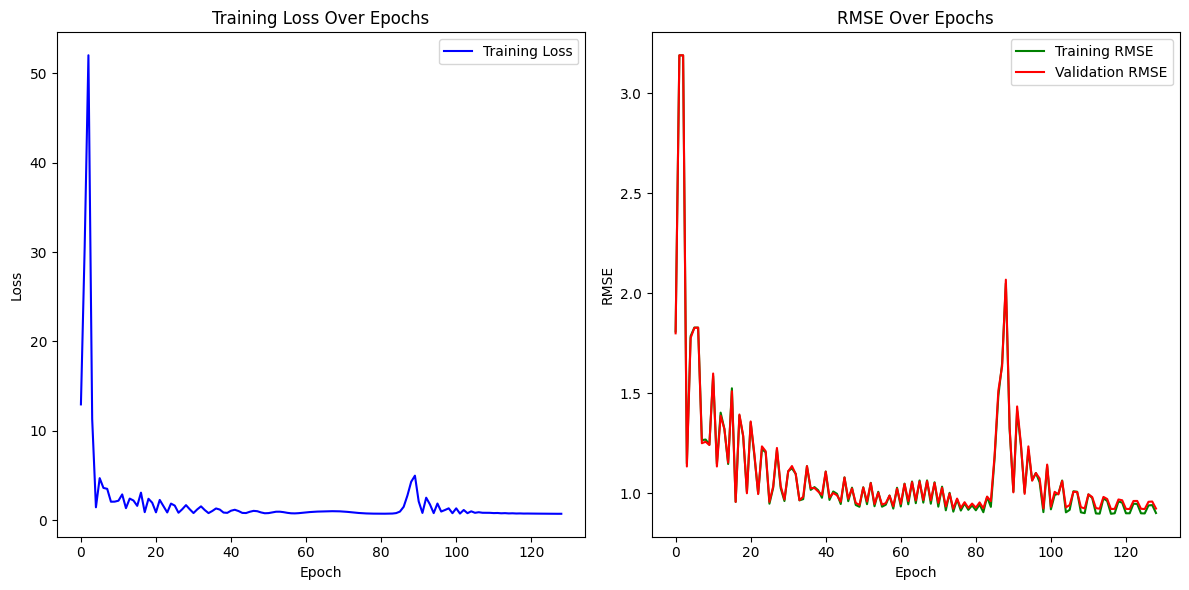

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

model = Model(hidden_channels=610).to(device)

# Initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to store the values for plotting
losses = []
train_rmses = []
val_rmses = []

def train():
    model.train()
    optimizer.zero_grad()
    pred = model(train_data.x_dict, train_data.edge_index_dict,
                 train_data['user', 'movie'].edge_label_index)
    target = train_data['user', 'movie'].edge_label.float()
    loss = F.mse_loss(pred, target)
    loss.backward()
    optimizer.step()
    return float(loss)

@torch.no_grad()
def test(data):
    data = data.to(device)
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict,
                 data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    pred = predict_best_rating(pred)
    target = data['user', 'movie'].edge_label
    rmse = F.mse_loss(pred, target).sqrt()
    return float(rmse)

# Training loop
for epoch in range(1, 130):
    train_data = train_data.to(device)
    loss = train()
    train_rmse = test(train_data)
    val_rmse = test(val_data)

    # Store the values for plotting
    losses.append(loss)
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}, '
          f'Val: {val_rmse:.4f}')

# Plotting the loss and RMSE
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(train_rmses, label='Training RMSE', color='green')
plt.plot(val_rmses, label='Validation RMSE', color='red')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import torch.nn.functional as F

with torch.no_grad():
    test_data = test_data.to(device)
    pred = model(test_data.x_dict, test_data.edge_index_dict,
                  test_data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    pred = predict_best_rating(pred)
    target = test_data['user', 'movie'].edge_label.float()

    # Calculate RMSE
    rmse = F.mse_loss(pred, target).sqrt()
    print(f'Test RMSE: {rmse:.4f}')

    # Convert to numpy arrays for easier manipulation
    userId = test_data['user', 'movie'].edge_label_index[0].cpu().numpy()
    movieId = test_data['user', 'movie'].edge_label_index[1].cpu().numpy()
    pred = pred.cpu().numpy()
    target = target.cpu().numpy()

    # Calculate exact accuracy
    correct_predictions = (pred == target).sum()  # Count exact matches
    accuracy = correct_predictions / len(target)  # Calculate accuracy

    print(f'Test Accuracy: {accuracy:.4f}')

    # Create a DataFrame for detailed predictions
    results_df = pd.DataFrame({
        'userId': userId,
        'movieId': movieId,
        'predicted_rating': pred,
        'target_rating': target
    })

Test RMSE: 0.9738
Test Accuracy: 0.3057


In [ ]:
import torch

# Define the number of users and movies
num_users = 610  # User IDs from 0 to 609
num_movies = 4980  # Movie IDs from 0 to 4979

# Create user IDs
user_ids = torch.arange(num_users)  # Creates a tensor [0, 1, ..., 609]

# Initialize a matrix to hold the ratings
ratings_matrix = torch.zeros(num_users, num_movies)  # Shape: [610, 4980]

# Move ratings_matrix to the appropriate device
ratings_matrix = ratings_matrix.to(device)

# Iterate over each movie and predict ratings
with torch.no_grad():
    for movie_id in range(num_movies):
        # Create a tensor for the specific movie ID
        movie_tensor = torch.tensor([movie_id]).to(device)  # Move to device

        # Create all possible edges (user, movie) pairs for the current movie
        user_grid = user_ids.repeat(1).to(device)  # Repeat user_ids
        movie_grid = movie_tensor.repeat(num_users).to(device)  # Repeat movie_tensor

        # Stack the grids to create the edge index for this movie
        edge_label_index = torch.stack((user_grid, movie_grid), dim=0)

        # Predict ratings for the current movie
        pred = model(train_data.x_dict, train_data.edge_index_dict, edge_label_index)

        # Clamp the predictions to ensure they are within the expected rating range
        pred = pred.clamp(min=0, max=5).detach().cpu()

        # Store predictions in the appropriate column of the ratings matrix
        ratings_matrix[:, movie_id] = pred.squeeze()  # Squeeze to ensure correct shape

# The ratings_matrix now contains predictions for all users across all movies
print(ratings_matrix.shape)  # Should be [610, 4980]

torch.Size([610, 4980])


In [ ]:
final_preds = predict_best_rating(ratings_matrix)
final_preds = final_preds.cpu().numpy()

In [ ]:
np.save('final_preds.npy', final_preds)

In [ ]:
loaded_preds = np.load('final_preds.npy')
loaded_preds.shape

(610, 4980)